In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/AAYUSH/Desktop/Aayush Kaji/miniproject/diabetes.csv")
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0


In [62]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']
print(y)

0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1388    0.0
1389    1.0
1390    1.0
1391    1.0
1392    1.0
Name: Outcome, Length: 1393, dtype: float64


visualizing distribution of data

C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_14388\1516614814.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data = data,palette='viridis')


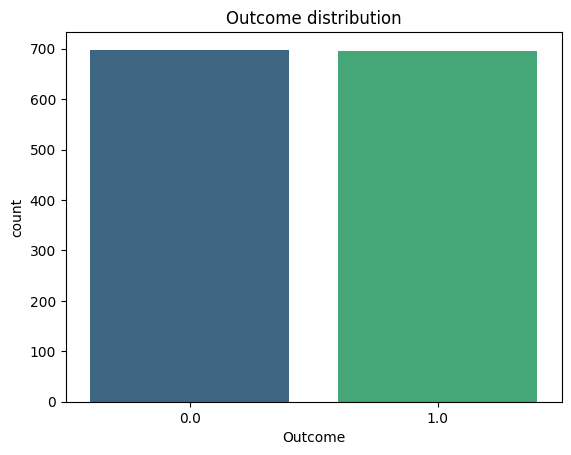

In [63]:
sns.countplot(x='Outcome',data = data,palette='viridis')
plt.title('Outcome distribution')
plt.show()

correlation heatmap

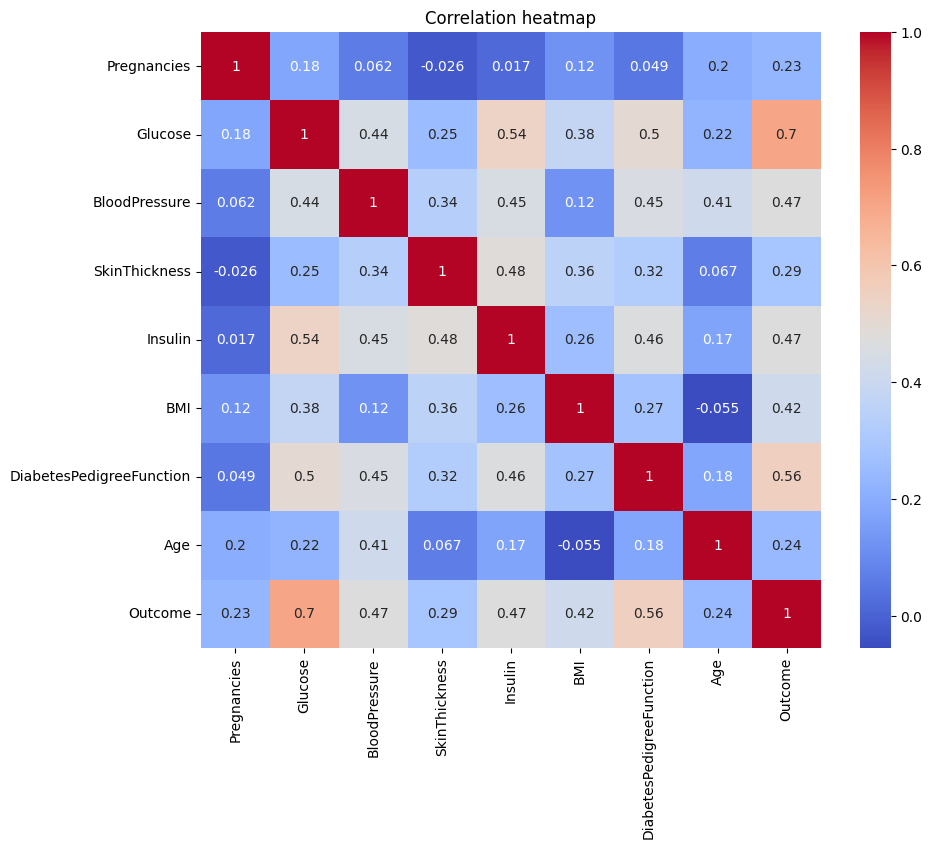

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

Standardizing the data

In [65]:
scaler=StandardScaler()
scaler.fit(x)
standard_data = scaler.transform(x)
x = standard_data
print(x)


[[ 0.80241525  0.50842796 -0.62971829 ...  0.40934023  0.05317834
   0.55516929]
 [-0.96788004 -1.21638279 -0.82654647 ... -0.54101026 -0.64967775
  -0.57921392]
 [ 1.51053337  1.46665616 -0.89215586 ... -0.98903263  0.16777444
  -0.51950954]
 ...
 [-0.61382098  1.82256949  1.40417288 ... -0.156143    1.13305804
  -0.57921392]
 [ 0.09429714  0.31678232  1.73221985 ... -0.41179908  1.35423086
   1.27162185]
 [ 0.09429714  1.08336488  0.97771183 ... -0.57053637  0.37725925
   0.67457805]]


Train test and splt

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


training of svm classifier

In [98]:
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

accuracy score of training data

In [99]:
x_train_pred = model.predict(x_train)
train_acc = accuracy_score(x_train_pred,y_train)
print(f"training accuracy :{train_acc*100}%")

training accuracy :88.0%


accuracy score of testing data

In [100]:
x_test_pred = model.predict(x_test)
test_acc = accuracy_score(y_test,x_test_pred)
print(f"testing accuracy :{test_acc*100}%")

testing accuracy :87.5598086124402%


visualizing training and testing accuracy

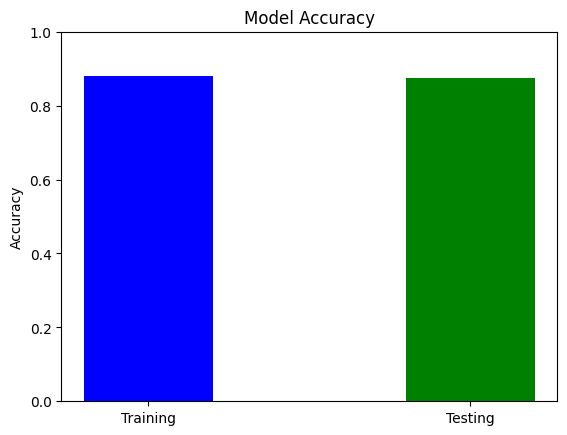

In [101]:
plt.bar(['Training','Testing'],[train_acc,test_acc],color=['b','g'],width=0.4)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

CONFUSION MATRIX

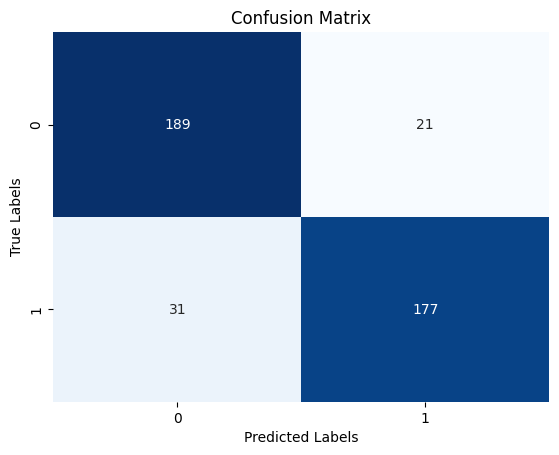

In [102]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [103]:
y_pred = model.predict(x_train)

precision = precision_score(y_train,y_pred)
recall = recall_score(y_train,y_pred)
f1 = f1_score(y_train,y_pred)

print("Precision of the model:", precision)
print("recall of the model:", recall)
print("f1 score of the model:", f1)



Precision of the model: 0.8936170212765957
recall of the model: 0.8624229979466119
f1 score of the model: 0.877742946708464


precision recall and f1 score of testing data

In [104]:


y_pred = model.predict(x_test)

precision = precision_score(y_test, y_pred)
recall  = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


print("Precision of the model:", precision)
print("recall of the model:", recall)
print("f1 score of the model:", f1)



Precision of the model: 0.8939393939393939
recall of the model: 0.8509615384615384
f1 score of the model: 0.8719211822660099


In [106]:
print('Enter your medical reports below')
pregnancies = float(input("Enter the no of pregnancies : "))
Glucose = float(input("Glucose level: "))
Blood_pressure = float(input("Enter your blood pressure: "))
skin_thickness = float(input("Enter the skin thickness: "))
insulin = float(input("Enter the insulin level: "))
bmi = float(input("Enter BMI: "))
Diabetes_pedigree = float(input("Enter the Diabetes Pedigree Function: "))
Age = float(input("Enter your Age: "))
new_data = np.array([pregnancies,Glucose,Blood_pressure,skin_thickness,insulin,bmi,Diabetes_pedigree,Age])
new_data_reshape = new_data.reshape(1,-1)
std_data = scaler.transform(new_data_reshape)
prediction = model.predict(std_data)
if(prediction[0] == 0):
    print("The person is non-diabetic")
else:
    print("Person is dibetic")


Enter your medical reports below
The person is non-diabetic


c:\Users\AAYUSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
